## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [70]:
#import dependencies 
import pandas as pd
from sklearn.cluster import KMeans # Import kmc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#import data
df = pd.read_csv('./data/airbnb_hw.csv')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [71]:
#Rename to match column names
df['price'] = df['Price']
df['beds'] = df['Beds']
df['n_reviews'] = df['Number Of Reviews']
df['score'] = df['Review Scores Rating']

#Take the cols listed and store in in a dataframe X
X = df.loc[:,['price','beds','n_reviews','score']]

print(X.shape)
X.describe()

(30478, 4)


,beds,n_reviews,score
count,30393.000000,30478.000000,22155.000000
mean,1.530089,12.018735,91.993230
std,1.015359,21.980703,8.850373
min,0.000000,0.000000,20.000000
25%,1.000000,0.000000,89.000000
50%,1.000000,3.000000,94.000000
75%,2.000000,13.000000,100.000000
max,16.000000,257.000000,100.000000


In [72]:
# Clean price by getting rid of the commas and convert to numeric
X['price'].value_counts()
X['price'] = X['price'].str.replace(',','')
X['price'] = pd.to_numeric(X['price'],errors='coerce')

# Clean beds by filling in missing values with 1
X['beds'] = X['beds'].fillna(1)

#Number of Reviews does not need to be cleaned 

X.describe()

,price,beds,n_reviews,score
count,30478.000000,30478.000000,30478.000000,22155.000000
mean,163.589737,1.528611,12.018735,91.993230
std,197.785454,1.014327,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [73]:
#Droping na values so we do not impute values and skew the clusters
X = X.dropna()

In [74]:
#Define maxmin method which maps numeric columns to numbers between 0 and 1
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

In [75]:
#Drop the price column and stor the result in Z. Apply the maxmin scaling the cols of Z
Z = X.drop('price',axis=1)
Z = Z.apply(maxmin)

In [76]:
# Initialize KMeans clustering with 6 clusters, 300 max iterations, 10 initializations, and a fixed random state using dataframe Z
model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0)
model = model.fit(Z) 
Z['cluster'] = model.labels_
Z.describe()

,beds,n_reviews,score,cluster
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,0.097312,0.060568,0.899915,2.149718
std,0.065205,0.094954,0.110630,1.401749
min,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.003906,0.862500,1.000000
50%,0.062500,0.023438,0.925000,1.000000
75%,0.125000,0.074219,1.000000,4.000000
max,1.000000,1.000000,1.000000,5.000000


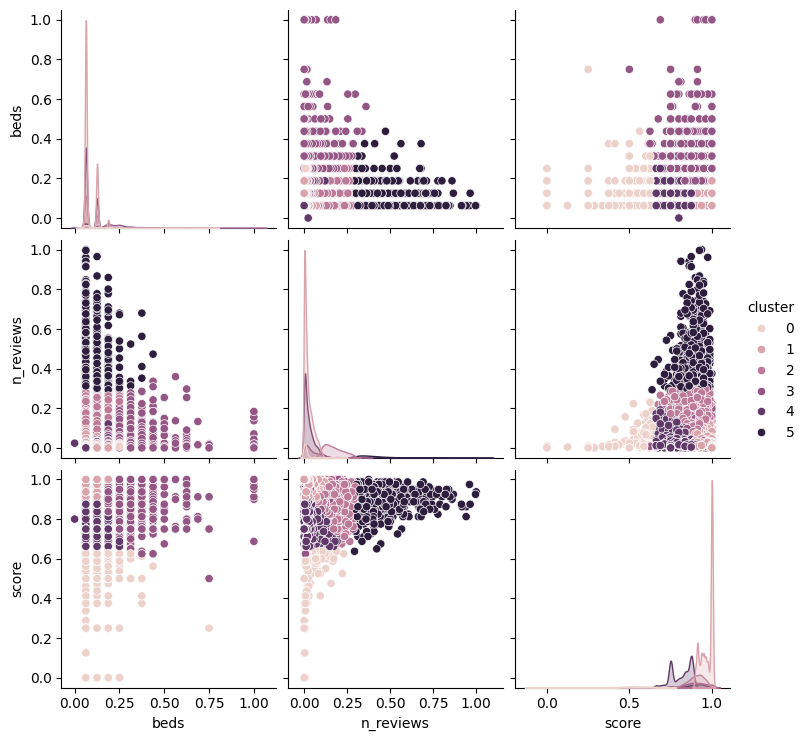

In [77]:
#Using seaborns pair plot to create a grid of 
sns.pairplot(data=Z,hue='cluster')

In [78]:
# Assign cluster labels to 'cluster' column in dataFrame X
X['cluster'] = model.labels_

# Group X by 'cluster', select 'price', and calculate descriptive statistics for each cluster
X.loc[:, ['price', 'cluster']].groupby('cluster').describe()

#Cluster 3 seems to have the highest price by far

price                                                             
           count        mean         std   min    25%    50%     75%      max
cluster                                                                      
0          632.0  133.587025  215.505565  25.0   65.0   99.0  151.25   5000.0
1        10529.0  152.287682  147.227153  10.0   85.0  130.0  190.00  10000.0
2         3022.0  141.489411   83.936285  22.0   87.0  125.0  175.00   1000.0
3         1626.0  293.528905  262.934691  27.0  150.0  229.0  350.00   4500.0
4         5554.0  131.631797  102.758887  20.0   75.0  110.0  169.00   5000.0
5          792.0  133.224747   83.088608  27.0   80.0  110.0  167.50    875.0

Text(0.5, 1.0, 'Scree Plot')

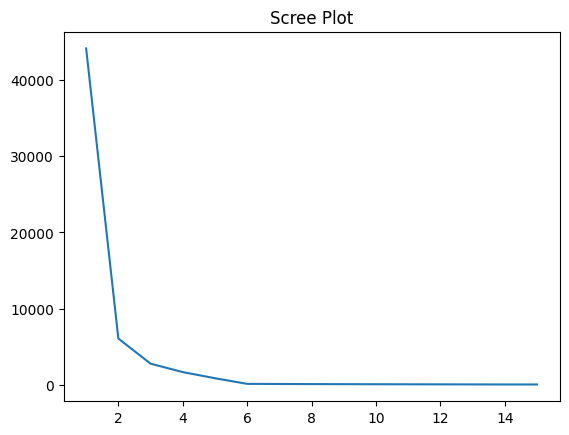

In [79]:
# Maximum number of clusters 
k_bar = 15

# Array of k values from 1 to k_bar
k_grid = np.arange(1, k_bar + 1)

# Initialize array to store SSE
SSE = np.zeros(k_bar)

for k in range(k_bar):
    # Initialize KMeans with k clusters using dataframe z
    model = KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0)
    
    model = model.fit(Z)
    
    # Store the SSE of the fitted model
    SSE[k] = model.inertia_

# A k value of 3 looks good
sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')


price                                                           
           count        mean         std   min   25%    50%    75%      max
cluster                                                                    
0        11161.0  151.228743  151.963553  10.0  85.0  129.0  190.0  10000.0
1         6346.0  131.830602  100.510035  20.0  75.0  110.0  169.0   5000.0
2         4648.0  194.677065  184.430237  22.0  99.0  150.0  225.0   4500.0

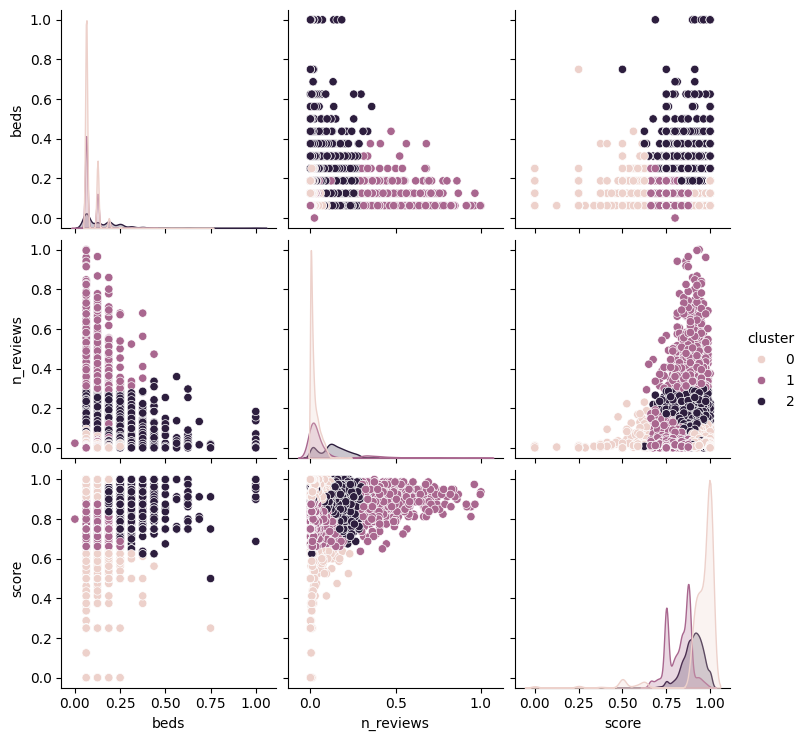

In [80]:
# Initialize KMeans with 3 clusters with data Z
model = KMeans(n_clusters=3, max_iter=300, n_init=10, random_state=0)

model = model.fit(Z)

# Assign cluster labels to 'cluster' column in Z
Z['cluster'] = model.labels_

# Create pairplot for Z 
sns.pairplot(data=Z, hue='cluster')

# Update X with cluster labels
X['cluster'] = model.labels_

# Group X by 'cluster', select 'price', and calculate descriptive statistics for each cluster
grouped_stats = X.loc[:, ['price', 'cluster']].groupby('cluster').describe()

#Cluster 2 has the highest mean 
grouped_stats


**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [81]:
def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

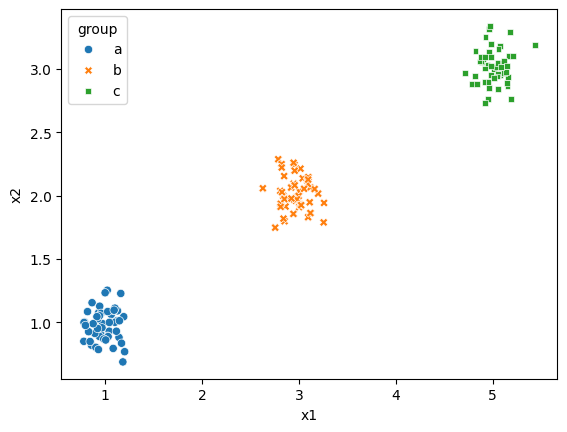

In [82]:
# Creating a scatter plot of 'x1' vs 'x2' from initialized dataframes
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

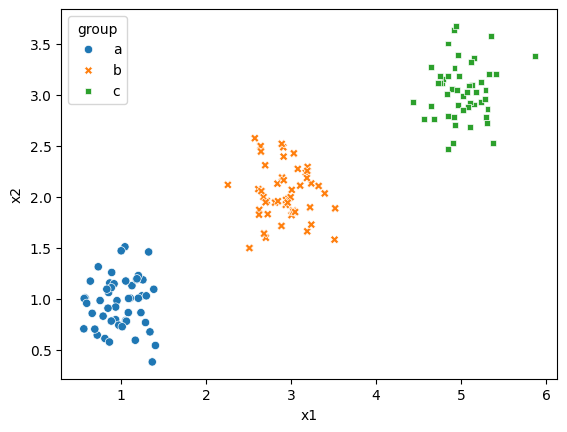

In [83]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

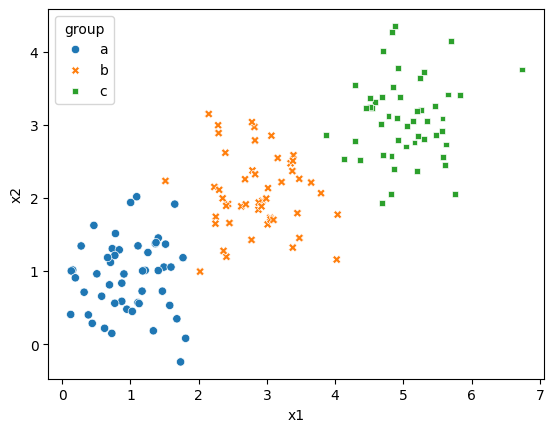

In [84]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

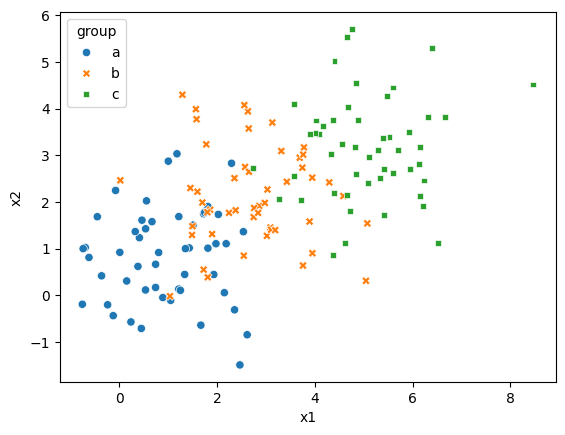

In [85]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

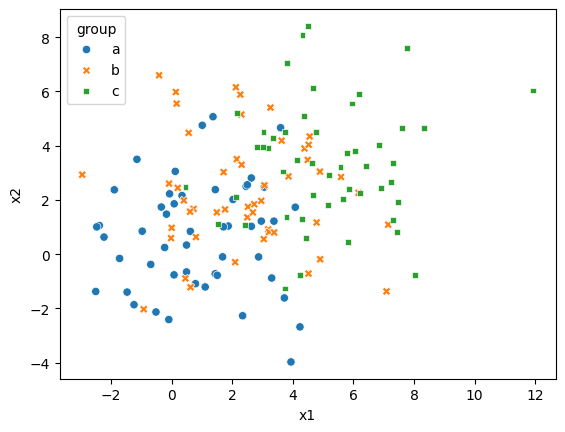

In [86]:
#As the noise increases, the cluster start to collide and become less distinct
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

In [87]:
#define scree method for efficiency
def scree(data):
    # maxmin the x1 and x2 cols
    X = data.loc[:, ['x1', 'x2']]
    X = X.apply(maxmin)
    
    # Define the range of cluster numbers to evaluate
    k_bar = 15
    k_grid = np.arange(1, k_bar + 1)
    
    # Initialize an array for SSE
    SSE = np.zeros(k_bar)
    
    # Loop over the range of cluster numbers, fit the KMeans model, and store the SSE
    for k in range(k_bar):
        model = KMeans(n_clusters=k + 1, max_iter=300, n_init=10, random_state=0)
        model = model.fit(X)
        SSE[k] = model.inertia_
    
    scree_plot, axes = plt.subplots()
    sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')


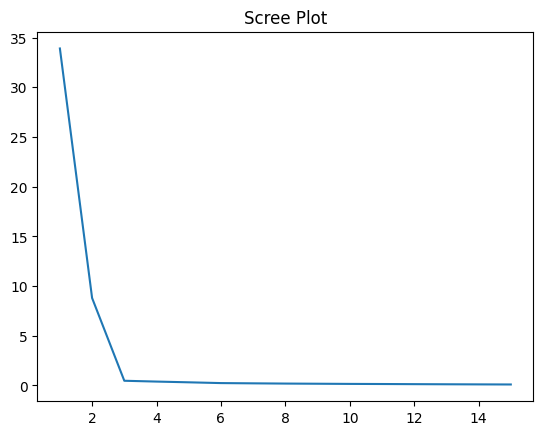

In [88]:
scree(df0_125)

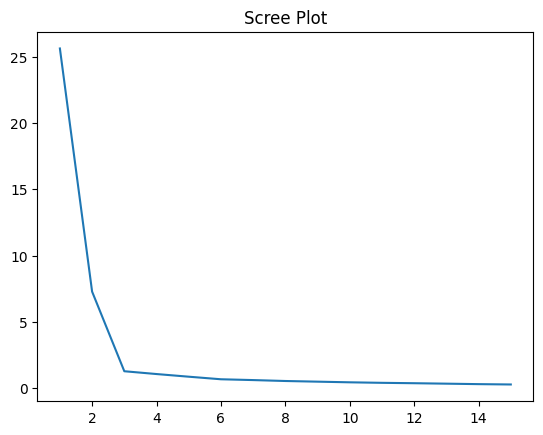

In [89]:
scree(df0_25)

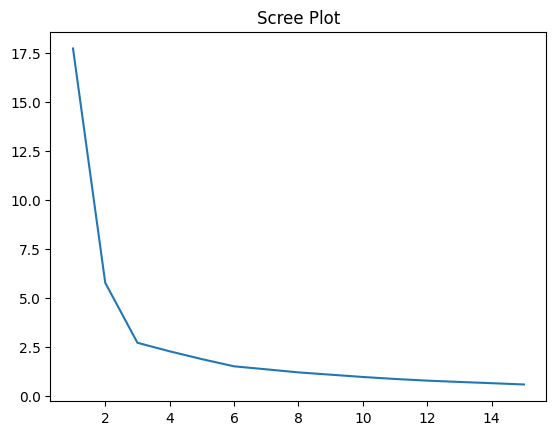

In [90]:
scree(data = df0_5)

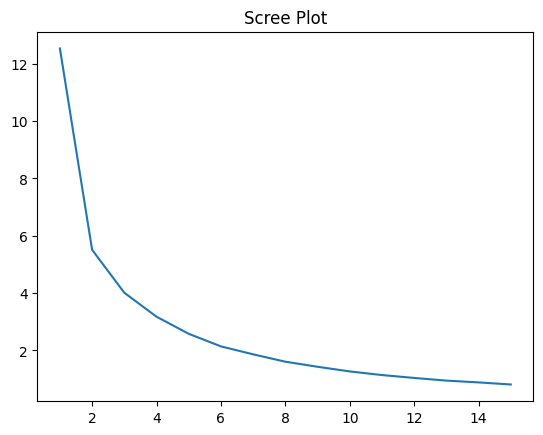

In [91]:
scree(df1_0)

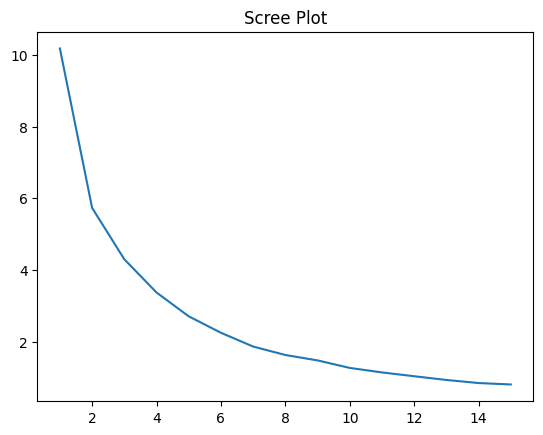

In [92]:
#Elbows at 3 until df1_0. Then the elbow becomes less obvious
scree(df2_0)

When groups are clearly separated, adding another cluster improves the model since it reduces the SSE. However, as data has increased noise, the groups begin to overlap and become visually unclear. Under these conditions, the stability and effectiveness of the clustering to reveal underlying differences may be compromised. Therefore, the effectiveness of using a scree plot to identify the optimal number of clusters depends on the data's distribution. A sharp elbow indicates clear, separate clusters, whereas a smooth curve suggests a more ambiguous clustering scenario.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?